In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c243e2b73b40c365e64d585e958b3f53af5ac75da1ba5065adb15aefe25d789b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


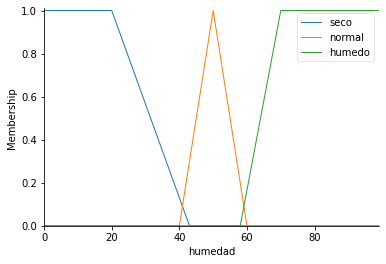

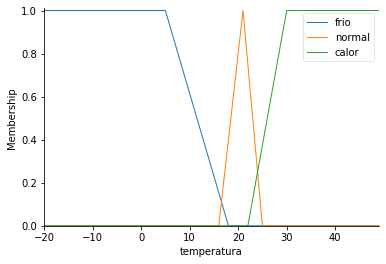

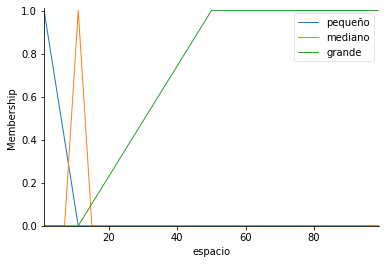

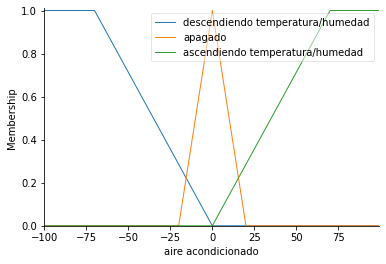

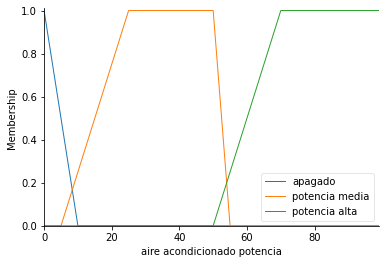

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

temperatura = ctrl.Antecedent(np.arange(-20, 50, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 100, 1), 'humedad')
espacio = ctrl.Antecedent(np.arange(1, 100, 1), 'espacio')
aireAcondicionado = ctrl.Consequent(np.arange(-100, 100, 1), 'aire acondicionado', defuzzify_method="bisector")
aireAcondicionadoPotencia = ctrl.Consequent(np.arange(0, 100, 1), 'aire acondicionado potencia', defuzzify_method="bisector")

humedad['seco'] = fuzz.trapmf(humedad.universe, [0, 0, 20, 43])
humedad['normal'] = fuzz.trimf(humedad.universe, [40, 50, 60])
humedad['humedo'] = fuzz.trapmf(humedad.universe, [58, 70, 100, 100])

temperatura['frio'] = fuzz.trapmf(temperatura.universe, [-20, -20, 5, 18])
temperatura['normal'] = fuzz.trimf(temperatura.universe, [16, 21, 25])
temperatura['calor'] = fuzz.trapmf(temperatura.universe, [22,30, 50, 50])

espacio['pequeño'] = fuzz.trimf(espacio.universe, [1, 1, 11])
espacio['mediano'] = fuzz.trimf(espacio.universe, [7, 11, 15])
espacio['grande'] = fuzz.trapmf(espacio.universe, [11,50, 100, 100])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
aireAcondicionado['descendiendo temperatura/humedad'] = fuzz.trapmf(aireAcondicionado.universe, [-100, -100,-70, 0])
aireAcondicionado['apagado'] = fuzz.trimf(aireAcondicionado.universe, [-20, 0, 20])
aireAcondicionado['ascendiendo temperatura/humedad'] = fuzz.trapmf(aireAcondicionado.universe, [0, 70, 100,100])

aireAcondicionadoPotencia['apagado'] = fuzz.trimf(aireAcondicionadoPotencia.universe, [0, 0,10])
aireAcondicionadoPotencia['potencia media'] = fuzz.trapmf(aireAcondicionadoPotencia.universe, [5, 25, 50,55])
aireAcondicionadoPotencia['potencia alta'] = fuzz.trapmf(aireAcondicionadoPotencia.universe, [50, 70, 100,100])

humedad.view()
temperatura.view()
espacio.view()
aireAcondicionado.view()
aireAcondicionadoPotencia.view()

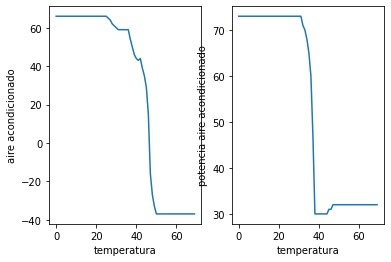

In [ ]:
rule1 = ctrl.Rule(temperatura['frio'] & humedad['seco'], aireAcondicionado['ascendiendo temperatura/humedad'])
rule2 = ctrl.Rule(temperatura['calor'] & humedad['humedo'], aireAcondicionado['descendiendo temperatura/humedad'])
rule3 = ctrl.Rule(temperatura['calor'] | humedad['humedo'], aireAcondicionado['descendiendo temperatura/humedad'])
rule4 = ctrl.Rule(temperatura['frio'] | humedad['seco'], aireAcondicionado['ascendiendo temperatura/humedad'])
rule5 = ctrl.Rule(temperatura['normal'] | humedad['normal'], aireAcondicionado['apagado'])

rule6 = ctrl.Rule(temperatura['frio'] & humedad['seco'] & espacio['grande'], aireAcondicionadoPotencia['potencia alta'])
rule7 = ctrl.Rule(temperatura['calor'] & humedad['humedo'] & espacio['grande'], aireAcondicionadoPotencia['potencia alta'])
rule8 = ctrl.Rule((temperatura['frio'] | humedad['seco']) & espacio['grande'], aireAcondicionadoPotencia['potencia alta'])
rule9 = ctrl.Rule((temperatura['calor'] | humedad['humedo']) & espacio['grande'], aireAcondicionadoPotencia['potencia alta'])
rule10 = ctrl.Rule((temperatura['calor'] & humedad['humedo']) & espacio['mediano'], aireAcondicionadoPotencia['potencia alta'])
rule11 = ctrl.Rule((temperatura['frio'] & humedad['seco']) & espacio['mediano'], aireAcondicionadoPotencia['potencia alta'])

rule12 = ctrl.Rule((temperatura['frio'] | humedad['seco']) & espacio['mediano'], aireAcondicionadoPotencia['potencia media'])
rule12 = ctrl.Rule((temperatura['calor'] | humedad['humedo']) & espacio['mediano'], aireAcondicionadoPotencia['potencia media'])
rule13 = ctrl.Rule((temperatura['calor'] & humedad['humedo']) & espacio['pequeño'], aireAcondicionadoPotencia['potencia media'])
rule14 = ctrl.Rule((temperatura['frio'] & humedad['seco']) & espacio['pequeño'], aireAcondicionadoPotencia['potencia media'])
rule13 = ctrl.Rule((temperatura['calor'] | humedad['humedo']) & espacio['pequeño'], aireAcondicionadoPotencia['potencia media'])
rule14 = ctrl.Rule((temperatura['frio'] | humedad['seco']) & espacio['pequeño'], aireAcondicionadoPotencia['potencia media'])

rule15 = ctrl.Rule((temperatura['normal'] & humedad['normal']) & espacio['pequeño'], aireAcondicionadoPotencia['apagado'])
rule16 = ctrl.Rule((temperatura['normal'] & humedad['normal']) & espacio['mediano'], aireAcondicionadoPotencia['apagado'])
rule17 = ctrl.Rule((temperatura['normal'] & humedad['normal']) & espacio['grande'], aireAcondicionadoPotencia['apagado'])

aireAcondicionado_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
aireAcondicionadoP_ctrl = ctrl.ControlSystem([rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
aire = ctrl.ControlSystemSimulation(aireAcondicionado_ctrl)
aireP = ctrl.ControlSystemSimulation(aireAcondicionadoP_ctrl)


b = []
c = []
humeda=30
aire.input['humedad'] = humeda
aireP.input['humedad'] = humeda
aireP.input['espacio'] = 10
for d in range(-20, 50):
    aire.input['temperatura'] = d
    aireP.input['temperatura'] = d
    aire.compute()
    aireP.compute()
    b.append(int(aire.output['aire acondicionado']))
    c.append(int(aireP.output['aire acondicionado potencia']))

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, constrained_layout=False)


ax1.set_xlabel("temperatura")
ax1.set_ylabel("aire acondicionado")
ax1.plot(b)
ax2.set_xlabel("temperatura")
ax2.set_ylabel("potencia aire acondicionado")
ax2.plot(c)

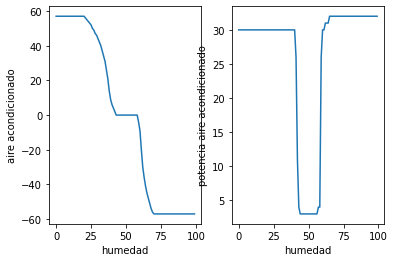

In [ ]:
# Humedad
b = []
c = []
temp=20
aire.input['temperatura'] = temp
aireP.input['temperatura'] = temp
for s in range(0, 100):
    aire.input['humedad'] = s
    aireP.input['humedad'] = s
    aire.compute()
    aireP.compute()
    b.append(int(aire.output['aire acondicionado']))
    c.append(int(aireP.output['aire acondicionado potencia']))

    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, constrained_layout=False)


ax1.set_xlabel("humedad")
ax1.set_ylabel("aire acondicionado")
ax1.plot(b)
ax2.set_xlabel("humedad")
ax2.set_ylabel("potencia aire acondicionado")
ax2.plot(c)


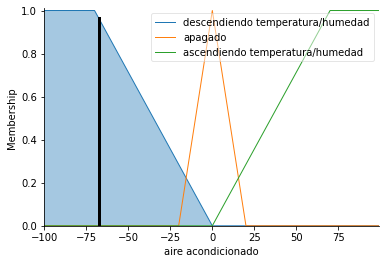

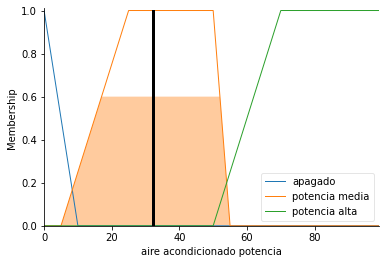

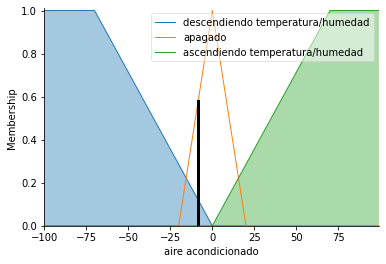

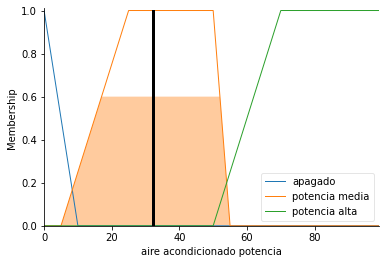

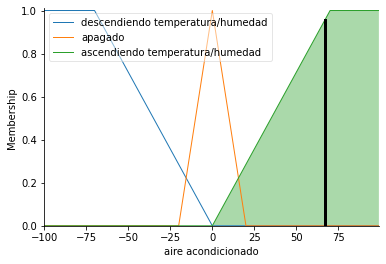

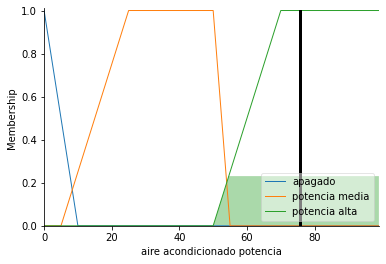

In [ ]:
aire.input['temperatura'] = 50
aire.input['humedad'] = 70
aire.compute()
aireAcondicionado.view(sim=aire)

aireP.input['temperatura'] = 50
aireP.input['humedad'] = 70
aireP.input['espacio'] = 5
aireP.compute()
aireAcondicionadoPotencia.view(sim=aireP)

aire.input['temperatura'] = -10
aire.input['humedad'] = 80
aire.compute()
aireAcondicionado.view(sim=aire)

aireP.input['temperatura'] = -10
aireP.input['humedad'] = 80
aireP.input['espacio'] = 5
aireP.compute()
aireAcondicionadoPotencia.view(sim=aireP)

aire.input['temperatura'] = -10
aire.input['humedad'] = 30
aire.compute()
aireAcondicionado.view(sim=aire)

aireP.input['temperatura'] = -10
aireP.input['humedad'] = 30
aireP.input['espacio'] = 20
aireP.compute()
aireAcondicionadoPotencia.view(sim=aireP)

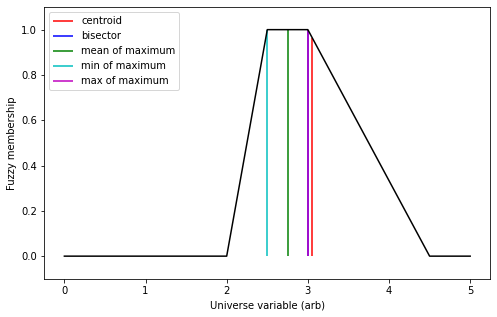

In [ ]:
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
    
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()